This file contains code to create PCA plot, dispersion plot, and gene vs sample norm count heatmap

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")
library(DESeq2)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘formatR’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘MatrixGenerics’, ‘RcppArmadillo’




In [ ]:
BiocManager::install("ComplexHeatmap")
BiocManager::install("circlize")
library(ComplexHeatmap)
library(circlize)
library(RColorBrewer)

In [ ]:
Counts <- read.delim("counts_file.csv", header = TRUE, row.names = 1, sep = ",")
dim(Counts)
Counts <- Counts[which(rowSums(Counts) > 0),]
dim(Counts)

[1] 19568     6

[1] 16045     6

In [ ]:
condition <- factor(c("BPA","BPA","BPA","BPA","Control","Control","Control","Control"))
coldata <- data.frame(row.names = colnames(Counts), condition)
coldata
dds <- DESeqDataSetFromMatrix(countData = Counts, colData = coldata, design = ~condition)
dds <- DESeq(dds)

,condition
,<fct>
SRR21043404,Estradiol
SRR21043569,Estradiol
SRR21043955,Estradiol
SRR21043814,Control
SRR21043816,Control
SRR21043817,Control


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [ ]:
dds

class: DESeqDataSet 
dim: 16045 6 
metadata(1): version
assays(4): counts mu H cooks
rownames(16045): ENSG00000175899 ENSG00000127837 ... ENSG00000111640
  ENSG00000108465
rowData names(22): baseMean baseVar ... deviance maxCooks
colnames(6): SRR21043404 SRR21043569 ... SRR21043816 SRR21043817
colData names(2): condition sizeFactor

using ntop=500 top features by variance



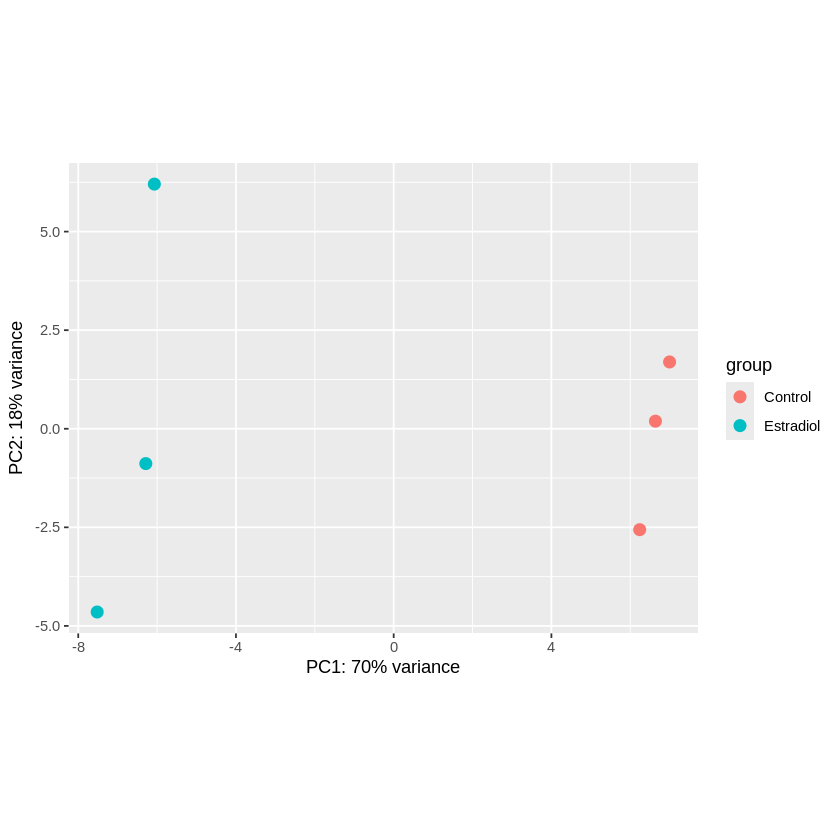

In [ ]:
vsdata <- vst(dds, blind=FALSE)
plotPCA(vsdata, intgroup = "condition")

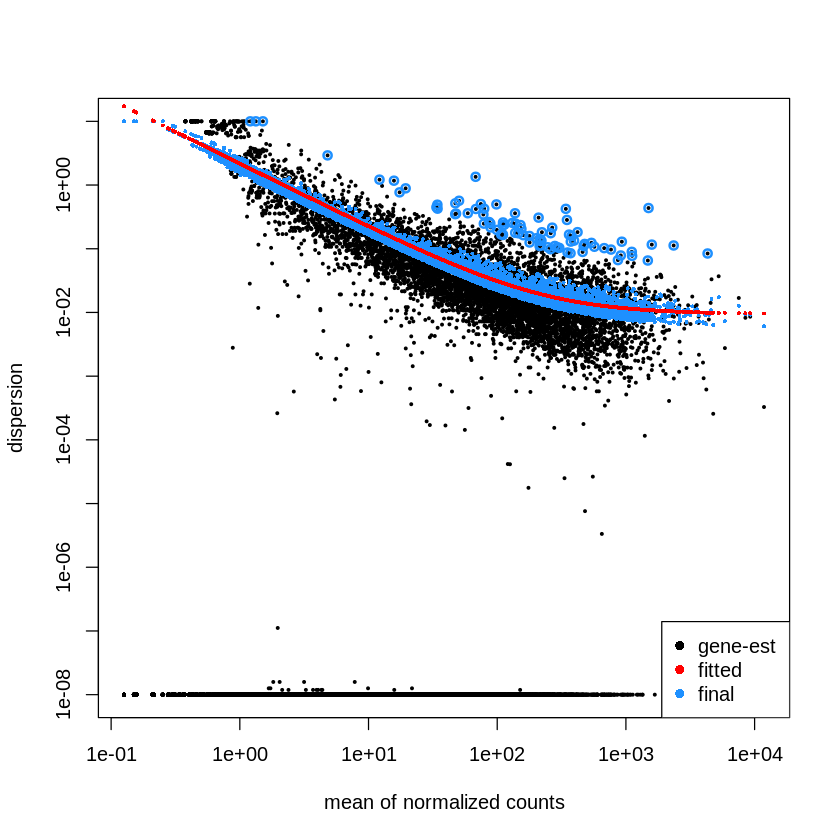

In [ ]:
plotDispEsts(dds)

In [ ]:
res <- results(dds, contrast = c("condition", "Estradiol", "Control"))
res

log2 fold change (MLE): condition Estradiol vs Control 
Wald test p-value: condition Estradiol vs Control 
DataFrame with 16045 rows and 6 columns
                  baseMean log2FoldChange     lfcSE      stat     pvalue
                 <numeric>      <numeric> <numeric> <numeric>  <numeric>
ENSG00000175899   0.576957      -1.613470  2.768826 -0.582727   0.560077
ENSG00000127837 149.024953       0.227982  0.209880  1.086248   0.277369
ENSG00000090861 245.812566       0.196888  0.164126  1.199613   0.230290
ENSG00000275700  38.347434       0.557762  0.341869  1.631510   0.102783
ENSG00000085563   4.217603      -1.484888  0.989188 -1.501118   0.133325
...                    ...            ...       ...       ...        ...
ENSG00000163138    1.61497     -0.2807759  1.528143 -0.183737 0.85422001
ENSG00000135486 2172.67320      0.4077137  0.128194  3.180444 0.00147049
ENSG00000168488  757.74524     -0.2690224  0.127113 -2.116397 0.03431109
ENSG00000111640 1345.43805     -0.0189704  0.11597

In [ ]:
sigs <- na.omit(res)
sigs <- sigs[sigs$padj < 0.05,]
print(sigs)
write.csv(sigs, file = "deseq_results.csv")
df <- as.data.frame(sigs)

log2 fold change (MLE): condition Estradiol vs Control 
Wald test p-value: condition Estradiol vs Control 
DataFrame with 698 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000075624   763.285      -0.441276  0.133794  -3.29817 9.73188e-04
ENSG00000182551   160.335      -0.556461  0.182477  -3.04949 2.29232e-03
ENSG00000188157   853.700      -0.482144  0.143585  -3.35790 7.85383e-04
ENSG00000196139   111.550      -1.180453  0.237731  -4.96550 6.85227e-07
ENSG00000106367   777.846       0.377478  0.122469   3.08224 2.05448e-03
...                   ...            ...       ...       ...         ...
ENSG00000205426   412.032      -2.185381  0.147692 -14.79687 1.53458e-49
ENSG00000266338   686.568       0.537771  0.122139   4.40296 1.06783e-05
ENSG00000272398   765.678      -1.383020  0.369855  -3.73936 1.84490e-04
ENSG00000277775   100.302       1.720633  0.239083  

In [ ]:
if (!requireNamespace("AnnotationDbi", quietly = TRUE)) {
  BiocManager::install("AnnotationDbi")
}
if (!requireNamespace("org.Hs.eg.db", quietly = TRUE)) {
  BiocManager::install("org.Hs.eg.db")
}
library(org.Hs.eg.db)
library(AnnotationDbi)
# done this before
gene_symbols <- mapIds(
  org.Hs.eg.db,
  keys = rownames(df),
  column = "SYMBOL",
  keytype = "ENSEMBL",
  multiVals = "first"
)

df$symbol <- gene_symbols

'select()' returned 1:many mapping between keys and columns



Sort genes by log2FoldChange (to prioritize upregulated ones).

Get rlog-normalized expression counts (to stabilize variance).

Extract a matrix of significant genes × samples (for visualization).

Calculate average expression per gene (for reference).

Normalize each gene’s expression using Z-scores (so data is comparable).

Transpose matrix and restore sample names.


In [ ]:
df.top <- df[ (df$baseMean > 10) & (abs(df$log2FoldChange) > 1), ]
df.top <- df.top[order(df.top$log2FoldChange, decreasing = TRUE),]
rlog_out <- rlog(dds, blind=FALSE)
mat<-assay(rlog_out)[rownames(df.top), rownames(coldata)]
colnames(mat) <- rownames(coldata)
base_mean <- rowMeans(mat)
mat.scaled <- t(apply(mat, 1, scale))
colnames(mat.scaled)<-colnames(mat)

In [ ]:
num_keep <- 10
num_keep <- min(num_keep, nrow(mat.scaled) %/% 2)
rows_keep <- c(seq(1, num_keep), seq(max(nrow(mat.scaled) - num_keep + 1, num_keep + 1), nrow(mat.scaled)))
l2_val <- as.matrix(df.top[rows_keep,]$log2FoldChange)
colnames(l2_val)<-"logFC"
mean <- as.matrix(df.top[rows_keep,]$baseMean)
colnames(mean)<-"AveExpr"

null device 
          1

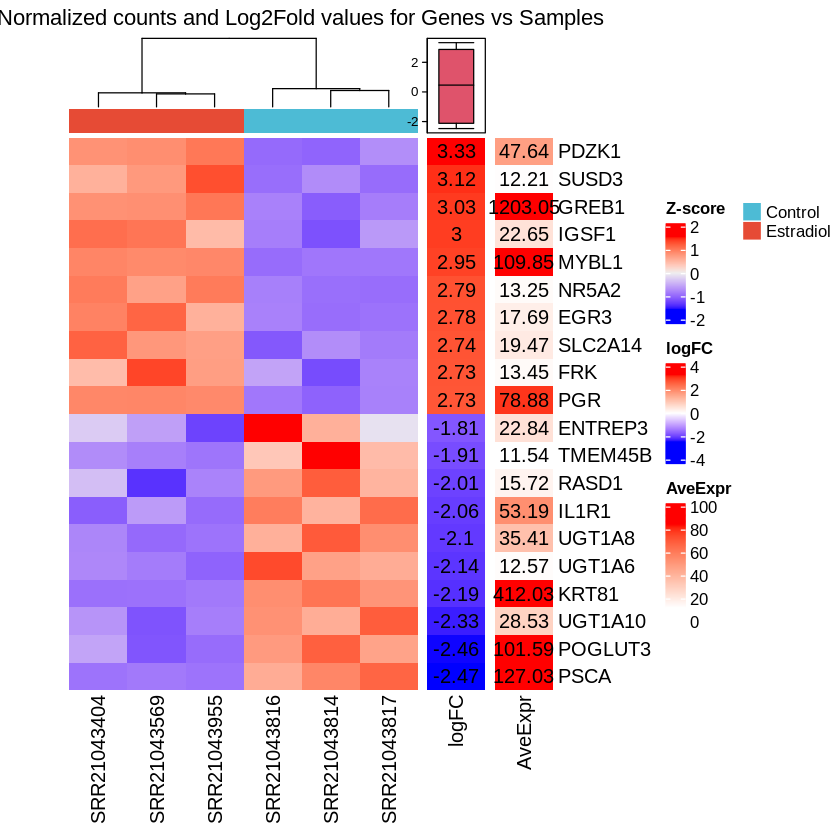

In [ ]:
# Load libraries
library(ComplexHeatmap)
library(circlize)

# Set color palettes
col_logFC <- colorRamp2(c(min(l2_val), 0, max(l2_val)), c("blue", "white", "red"))
col_AveExpr <- colorRamp2(c(quantile(mean)[1], quantile(mean)[4]), c("white", "red"))

# === Correct way: get sample group from coldata$condition ===
sample_groups <- coldata$condition  # use the factor you already created
names(sample_groups) <- rownames(coldata)  # match names to accession IDs (your columns)

# Color mapping
group_colors <- c("Control" = "#4DBBD5", "Estradiol" = "#E64B35")  # assuming C=Control, S=Treatment

# Create the top annotation
top_anno <- HeatmapAnnotation(
  Group = sample_groups,
  col = list(Group = group_colors),
  annotation_legend_param = list(title = NULL),
  annotation_name_side = "left",
  annotation_name_gp = gpar(col = NA)  # <-- hides the "Group" label next to the bar
)

# === Side Annotation for summary (you already had) ===
ha <- HeatmapAnnotation(summary = anno_summary(gp = gpar(fill = 2),
                                               height = unit(2, "cm")))

# === Build the heatmaps ===
h1 <- Heatmap(mat.scaled[rows_keep, ],
              cluster_rows = FALSE,
              column_labels = colnames(mat.scaled),
              name = "Z-score",
              cluster_columns = TRUE,
              top_annotation = top_anno,
              column_title = "                   Normalized counts and Log2Fold values for Genes vs Samples" )  # <-- add group annotation here,


h2 <- Heatmap(l2_val,
              row_labels = df.top$symbol[rows_keep],
              cluster_rows = FALSE,
              name = "logFC",
              top_annotation = ha,
              col = col_logFC,
              cell_fun = function(j, i, x, y, w, h, col) {
                grid.text(round(l2_val[i, j], 2), x, y)
              })

h3 <- Heatmap(mean,
              row_labels = df.top$symbol[rows_keep],
              cluster_rows = FALSE,
              name = "AveExpr",
              col = col_AveExpr,
              cell_fun = function(j, i, x, y, w, h, col) {
                grid.text(round(mean[i, j], 2), x, y)
              })

# === Combine heatmaps ===
h <- h1 + h2 + h3

# === Draw heatmaps ===
draw(h, heatmap_legend_side = "right", annotation_legend_side = "right")

# === Save ===
dev.off()

# make it more balanced

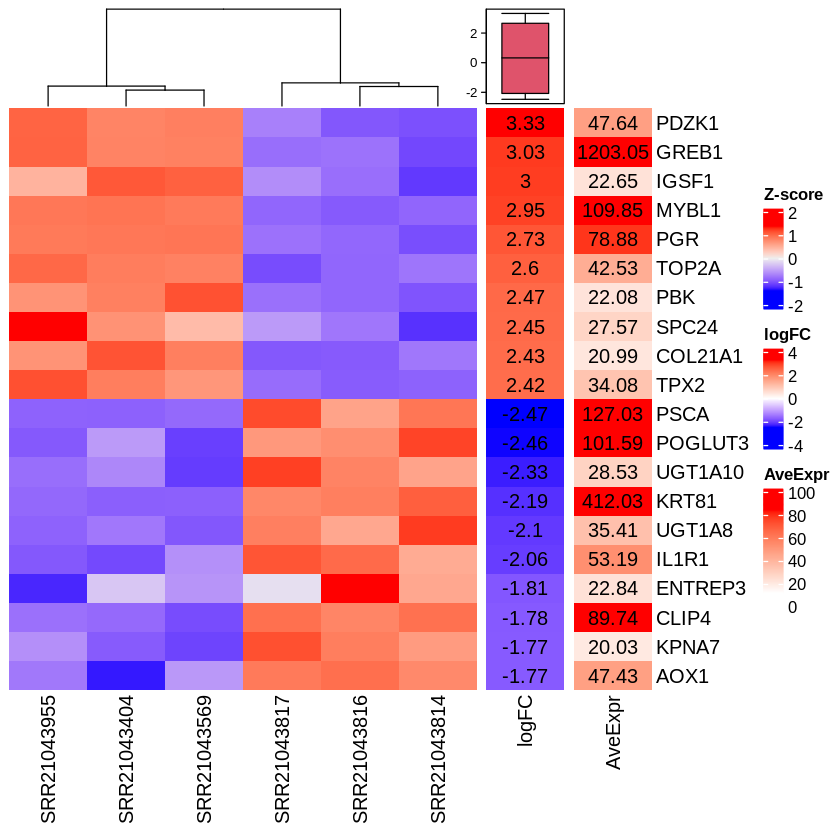

In [ ]:
df.top <- df[ (df$baseMean > 20) & (abs(df$log2FoldChange) > 1.5),]
df.top.up <- df.top[df.top$log2FoldChange > 0, ]
df.top.down <- df.top[df.top$log2FoldChange < 0, ]
df.top.up <- df.top.up[order(df.top.up$log2FoldChange, decreasing = TRUE),]
df.top.down <- df.top.down[order(df.top.down$log2FoldChange, decreasing = FALSE),]
num_keep_up <- min(num_keep, nrow(df.top.up))
num_keep_down <- min(num_keep, nrow(df.top.down))
rows_keep_up <- seq(1, num_keep_up)
rows_keep_down <- seq(1, num_keep_down)
df.top <- rbind(df.top.up[rows_keep_up, ], df.top.down[rows_keep_down, ])
mat <- assay(rlog_out)[rownames(df.top), rownames(coldata)]
colnames(mat) <- rownames(coldata)
mat.scaled <- t(apply(mat, 1, scale))
colnames(mat.scaled) <- colnames(mat)
l2_val <- as.matrix(df.top$log2FoldChange)
colnames(l2_val) <- "logFC"
mean <- as.matrix(df.top$baseMean)
colnames(mean) <- "AveExpr"
h1 <- Heatmap(mat.scaled, cluster_rows = FALSE,
              column_labels = colnames(mat.scaled), name = "Z-score",
              cluster_columns = TRUE)

h2 <- Heatmap(l2_val, row_labels = df.top$symbol,
              cluster_rows = FALSE, name = "logFC", top_annotation = ha, col = col_logFC,
              cell_fun = function(j, i, x, y, w, h, col) {
                grid.text(round(l2_val[i, j],2), x, y)
              })

h3 <- Heatmap(mean, row_labels = df.top$symbol,
              cluster_rows = FALSE, name = "AveExpr", col = col_AveExpr,
              cell_fun = function(j, i, x, y, w, h, col) {
                grid.text(round(mean[i, j],2), x, y)
              })
h <- h1 + h2 + h3
print(h)


In [ ]:
colnames(mat.scaled)

[1] "SRR21043272" "SRR21043511" "SRR21043594" "SRR21043932" "SRR21043816"
[6] "SRR21043814" "SRR21043817" "SRR21043815"